### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
column_names = (
    ["engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"]
    + [f"sensor_{i}" for i in range(1, 22)]
)
file_path = Path("../../..") / "data" / "train_FD001.txt"
df= pd.read_csv(file_path, sep=r"\s+", header=None, names=column_names)
print("Shape:", df.shape)

print("\nDataFrame info:")
print(df.info())


Shape: (20631, 26)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  flo

In [2]:
print("\nFirst 5 rows:")
print(df.head())
df.shape



First 5 rows:
   engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0          1      1       -0.0007       -0.0004         100.0    518.67   
1          1      2        0.0019       -0.0003         100.0    518.67   
2          1      3       -0.0043        0.0003         100.0    518.67   
3          1      4        0.0007        0.0000         100.0    518.67   
4          1      5       -0.0019       -0.0002         100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0    641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1    642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2    642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3    642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4    642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   

   sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0    8138.62     8.4195       

(20631, 26)

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

In [3]:
df.isnull().sum()

engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64

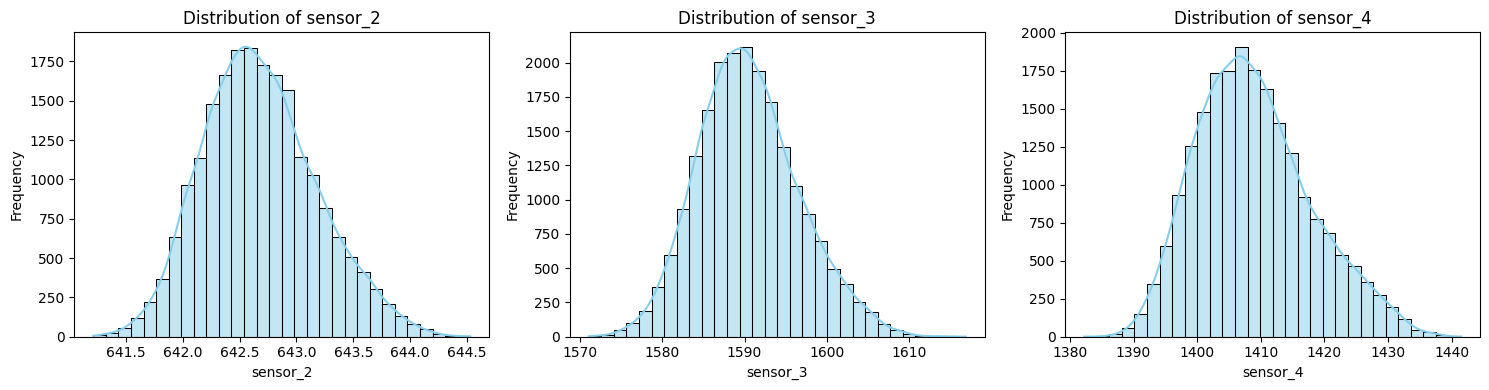

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sensor_cols = ["sensor_2", "sensor_3", "sensor_4"] 

plt.figure(figsize=(15, 4))
for i, col in enumerate(sensor_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [5]:
engine_aggs = df.groupby('engine_id')['sensor_3'].agg(['mean', 'std'])
engine_aggs.columns = [''.join(col) for col in engine_aggs.columns]
engine_aggs.reset_index(inplace=True)
print(f"Aggregate feature matrix shape: {engine_aggs.shape}")
engine_aggs.tail()

Aggregate feature matrix shape: (100, 3)


,engine_id,mean,std
95,96,1589.856190,5.853261
96,97,1589.431436,6.164926
97,98,1588.884167,6.312261
98,99,1589.501622,5.717641
99,100,1591.659650,5.367951


In [6]:
df['sensor_3_rollmean5'] = df.groupby('engine_id')['sensor_3'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df['sensor_3_rollstd5'] = df.groupby('engine_id')['sensor_3'].rolling(window=5, min_periods=1).std().reset_index(level=0, drop=True)
df[['sensor_3', 'sensor_3_rollmean5', 'sensor_3_rollstd5']].head(10)

,sensor_3,sensor_3_rollmean5,sensor_3_rollstd5
0,1589.70,1589.700000,NaN
1,1591.82,1590.760000,1.499066
2,1587.99,1589.836667,1.918654
3,1582.79,1588.075000,3.855909
4,1582.85,1587.030000,4.075678
5,1584.47,1585.984000,3.885831
6,1592.32,1586.084000,4.075375
7,1582.96,1585.078000,4.107952
8,1590.98,1586.716000,4.573962
9,1591.24,1588.394000,4.333784


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [7]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [col for col in df.columns if ('sensor_'in col) or ('roll' in col)]


scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df_scaled[features_to_scale].describe().T[['mean', 'std']]

,mean,std
sensor_1,0.000000e+00,0.000000
sensor_2,6.410348e-14,1.000024
sensor_3,-4.959437e-14,1.000024
sensor_4,9.285169e-16,1.000024
sensor_5,-1.776357e-15,0.000000
sensor_6,-6.469426e-12,1.000024
sensor_7,-3.161641e-14,1.000024
sensor_8,1.008249e-12,1.000024
sensor_9,-4.185765e-14,1.000024
sensor_10,0.000000e+00,0.000000


In [8]:
df_scaled.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_3_rollmean5,sensor_3_rollstd5
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,...,-0.269071,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,-0.138150,NaN
1,1,2,0.0019,-0.0003,100.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,...,-0.642845,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,0.079774,-1.634495
2,1,3,-0.0043,0.0003,100.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,...,-0.551629,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,-0.110053,-1.331438
3,1,4,0.0007,0.0000,100.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,...,-0.520176,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,-0.472231,0.067789
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,...,-0.521748,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,-0.687070,0.226523


#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.